In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as pp

In [4]:
!ls

lost+found  ml.ipynb  mnist_test.csv  mnist_train.csv  Untitled.ipynb


In [5]:
mnist_test = pd.read_csv('./mnist_test.csv', header=None)

In [6]:
mnist_train = pd.read_csv('./mnist_train.csv', header=None)

In [7]:
cnames = ["label"] + ['px_%s.%s' % (x,y) for x in range(28) for y in range(28)]

In [8]:
mnist_train.columns = cnames

In [9]:
mnist_test.columns = cnames

In [10]:
image_size = 28

In [11]:
label_train = mnist_train['label'].values

In [12]:
label_train.shape

(60000,)

In [13]:
label_test = mnist_test['label'].values

In [14]:
label_test.shape

(10000,)

In [15]:
image_train = mnist_train.values[:, 1:]

In [16]:
image_train.shape

(60000, 784)

In [17]:
image_test = mnist_test.values[:, 1:]

In [18]:
image_test.shape

(10000, 784)

In [19]:
image_train = image_train.reshape(60000, 28, 28)

In [20]:
image_test = image_test.reshape(10000, 28, 28)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [23]:
lines_train = image_train.reshape(60000, 784)

In [24]:
lines_test = image_test.reshape(10000, 784)

In [26]:
n = 25
acc = np.zeros(n)

for _ in range(1, n):
    knnc = KNeighborsClassifier(n_jobs=-1, n_neighbors=_)
    %time knnc.fit(lines_train, label_train)
    %time preds_test = knnc.predict(lines_test)
    acc_ = accuracy_score(label_test, preds_test)
    print('\t%s\t%s' % (_, acc_))
    acc[_] = acc_

CPU times: user 31.7 s, sys: 125 ms, total: 31.8 s
Wall time: 31.8 s
CPU times: user 21min, sys: 30.2 ms, total: 21min
Wall time: 1min 19s
	1	0.9691
CPU times: user 31.4 s, sys: 116 ms, total: 31.6 s
Wall time: 31.5 s
CPU times: user 20min 59s, sys: 31.7 ms, total: 20min 59s
Wall time: 1min 20s
	2	0.9627
CPU times: user 31.4 s, sys: 144 ms, total: 31.5 s
Wall time: 31.5 s
CPU times: user 21min 5s, sys: 19.8 ms, total: 21min 5s
Wall time: 1min 20s
	3	0.9705
CPU times: user 31.4 s, sys: 116 ms, total: 31.6 s
Wall time: 31.5 s
CPU times: user 21min 2s, sys: 11.9 ms, total: 21min 2s
Wall time: 1min 19s
	4	0.9682
CPU times: user 31.4 s, sys: 152 ms, total: 31.5 s
Wall time: 31.5 s
CPU times: user 21min 2s, sys: 11.9 ms, total: 21min 2s
Wall time: 1min 19s
	5	0.9688
CPU times: user 31.4 s, sys: 152 ms, total: 31.6 s
Wall time: 31.5 s
CPU times: user 21min 1s, sys: 7.96 ms, total: 21min 1s
Wall time: 1min 20s
	6	0.9677
CPU times: user 31.4 s, sys: 144 ms, total: 31.6 s
Wall time: 31.5 s
CPU t

In [27]:
acc

array([0.    , 0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694,
       0.967 , 0.9659, 0.9665, 0.9668, 0.9661, 0.9653, 0.964 , 0.9633,
       0.9632, 0.963 , 0.9633, 0.9632, 0.9625, 0.963 , 0.9618, 0.9619,
       0.9608])

In [32]:
acc[1:]

array([0.9691, 0.9627, 0.9705, 0.9682, 0.9688, 0.9677, 0.9694, 0.967 ,
       0.9659, 0.9665, 0.9668, 0.9661, 0.9653, 0.964 , 0.9633, 0.9632,
       0.963 , 0.9633, 0.9632, 0.9625, 0.963 , 0.9618, 0.9619, 0.9608])

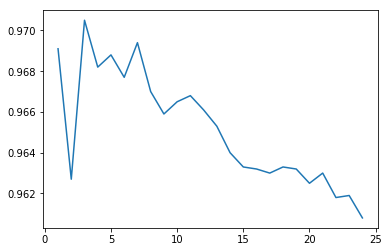

In [33]:
pp.plot(range(1, n), acc[1:n])

In [74]:
knnc = KNeighborsClassifier(n_jobs=-1, n_neighbors=15)
%time knnc.fit(lines_train, label_train)

CPU times: user 31.4 s, sys: 152 ms, total: 31.6 s
Wall time: 31.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
           weights='uniform')

In [75]:
knnc.predict([lines_test[321]])

array([7])

In [76]:
knnc.predict_proba([lines_test[321]])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

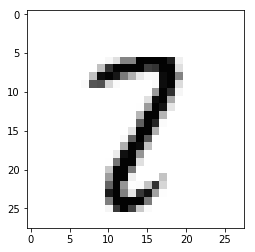

In [77]:
pp.imshow(image_test[321], cmap='Greys')

In [78]:
dists, neighs = knnc.kneighbors([lines_test[321]])

7


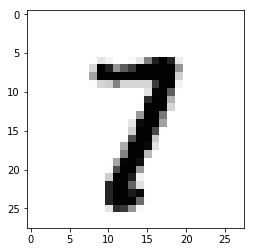

7


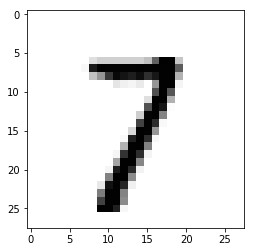

7


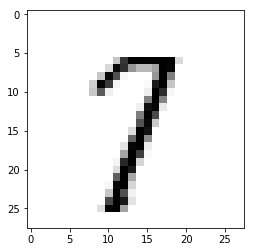

7


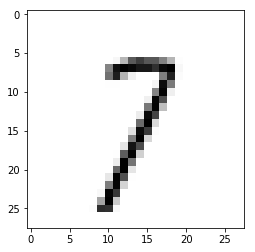

7


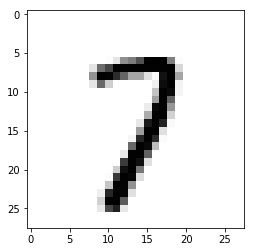

7


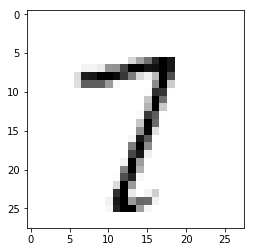

7


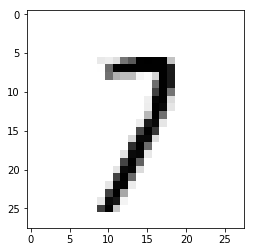

7


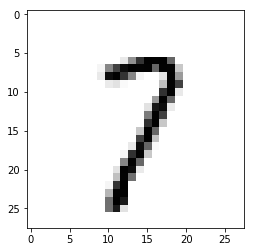

7


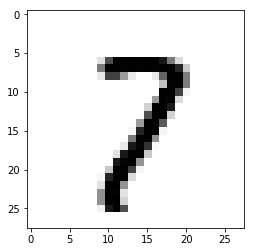

7


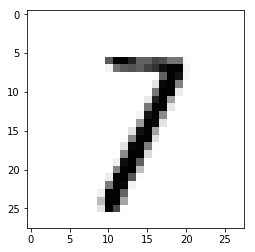

7


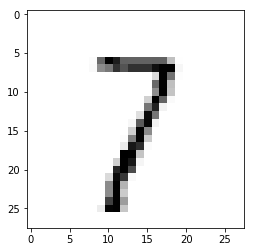

7


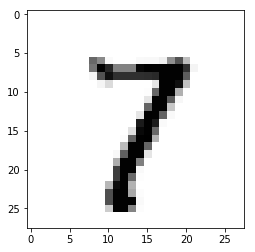

7


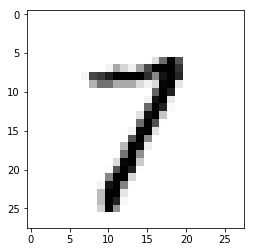

7


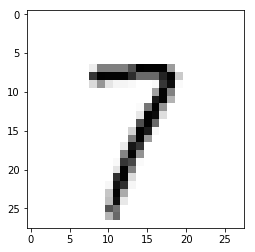

7


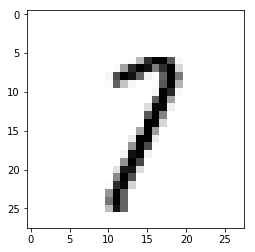

In [79]:
for dist, neigh in zip(dists[0], neighs[0]):
    print(label_train[neigh])
    pp.imshow(image_train[neigh], cmap='Greys')
    pp.show()